In [39]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key
import time

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f982584af00114b44817f7b60fb7ac8e


In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verkhnevilyuysk
Processing Record 2 of Set 1 | asau
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | parsons
Processing Record 8 of Set 1 | kuytun
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | ekhabi
Processing Record 11 of Set 1 | ferme-neuve
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | hami
Processing Record 19 of Set 1 | jiddah
City not found. Skipping...
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Reco

Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | fairbanks
Processing Record 43 of Set 4 | zalantun
Processing Record 44 of Set 4 | tabou
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | uray
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | tawkar
City not found. Skipping...
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | malanje
Processing Record 5 of Set 5 | port-cartier
Processing Record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 5 | ceyhan
Processing Record 8 of Set 5 | belaya gora
Processing Record 9 of Set 5 | palmer
Processing Record 10 of Set 5 | broome
Processing Record 11 of Set 5 | kununurra
Processing Record 12 of Set 5 | creel
Processing Reco

Processing Record 32 of Set 8 | longido
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | sistranda
Processing Record 35 of Set 8 | nabire
Processing Record 36 of Set 8 | demba
Processing Record 37 of Set 8 | eldikan
City not found. Skipping...
Processing Record 38 of Set 8 | bengkulu
Processing Record 39 of Set 8 | lac du bonnet
Processing Record 40 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 8 | safwah
City not found. Skipping...
Processing Record 42 of Set 8 | qasigiannguit
Processing Record 43 of Set 8 | grahamstown
Processing Record 44 of Set 8 | cascais
Processing Record 45 of Set 8 | sao domingos
Processing Record 46 of Set 8 | miri
Processing Record 47 of Set 8 | orlik
Processing Record 48 of Set 8 | laramie
Processing Record 49 of Set 8 | bhabua
Processing Record 50 of Set 8 | swan river
Processing Record 1 of Set 9 | meulaboh
Processing Record 2 of Set 9 | gaziantep
Processing Record 3 of Set 9 | nigde
Processing Record 4 of 

Processing Record 22 of Set 12 | oranjemund
Processing Record 23 of Set 12 | pitkyaranta
Processing Record 24 of Set 12 | charters towers
Processing Record 25 of Set 12 | melegnano
Processing Record 26 of Set 12 | sturgeon bay
Processing Record 27 of Set 12 | te anau
Processing Record 28 of Set 12 | burkhala
City not found. Skipping...
Processing Record 29 of Set 12 | bacolod
Processing Record 30 of Set 12 | buraydah
Processing Record 31 of Set 12 | ismailia
Processing Record 32 of Set 12 | abu dhabi
Processing Record 33 of Set 12 | sarkand
Processing Record 34 of Set 12 | novyy urgal
Processing Record 35 of Set 12 | poronaysk
Processing Record 36 of Set 12 | jinchang
Processing Record 37 of Set 12 | menongue
Processing Record 38 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 39 of Set 12 | ambon
Processing Record 40 of Set 12 | palasa
Processing Record 41 of Set 12 | nizwa
Processing Record 42 of Set 12 | portarlington
Processing Record 43 of Set 12 | port linc

In [31]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkhnevilyuysk,63.45,120.32,-3.86,89,14,4.56,RU,2020-11-09 01:25:57
1,Asau,46.43,26.40,42.01,100,0,4.70,RO,2020-11-09 01:25:57
2,Ushuaia,-54.80,-68.30,44.60,52,75,27.51,AR,2020-11-09 01:21:21
3,Mataura,-46.19,168.86,57.00,69,93,8.01,NZ,2020-11-09 01:21:31
4,Punta Arenas,-53.15,-70.92,42.80,75,0,17.22,CL,2020-11-09 01:21:06
5,Parsons,37.34,-95.26,71.60,60,90,14.99,US,2020-11-09 01:25:58
6,Kuytun,54.34,101.50,27.41,96,80,6.62,RU,2020-11-09 01:25:58
7,Dikson,73.51,80.55,1.42,93,96,12.44,RU,2020-11-09 01:25:58
8,Ekhabi,53.51,142.97,26.29,97,100,20.24,RU,2020-11-09 01:25:58
9,Ferme-Neuve,46.70,-75.45,46.40,93,0,3.36,CA,2020-11-09 01:25:58


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [33]:
ordered_city_data_df = city_data_df[new_column_order]

In [34]:
ordered_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Verkhnevilyuysk,RU,2020-11-09 01:25:57,63.45,120.32,-3.86,89,14,4.56
1,Asau,RO,2020-11-09 01:25:57,46.43,26.40,42.01,100,0,4.70
2,Ushuaia,AR,2020-11-09 01:21:21,-54.80,-68.30,44.60,52,75,27.51
3,Mataura,NZ,2020-11-09 01:21:31,-46.19,168.86,57.00,69,93,8.01
4,Punta Arenas,CL,2020-11-09 01:21:06,-53.15,-70.92,42.80,75,0,17.22
5,Parsons,US,2020-11-09 01:25:58,37.34,-95.26,71.60,60,90,14.99
6,Kuytun,RU,2020-11-09 01:25:58,54.34,101.50,27.41,96,80,6.62
7,Dikson,RU,2020-11-09 01:25:58,73.51,80.55,1.42,93,96,12.44
8,Ekhabi,RU,2020-11-09 01:25:58,53.51,142.97,26.29,97,100,20.24
9,Ferme-Neuve,CA,2020-11-09 01:25:58,46.70,-75.45,46.40,93,0,3.36


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
type(lats)

pandas.core.series.Series

In [40]:
today = time.time()
today

1604866435.7753549

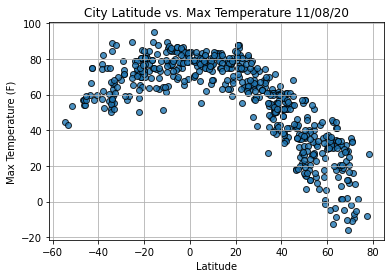

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

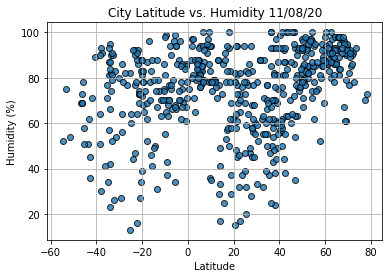

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

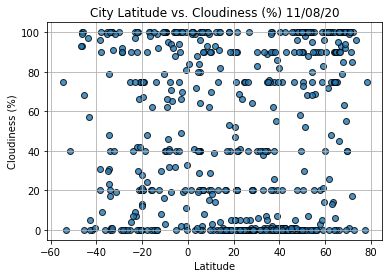

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

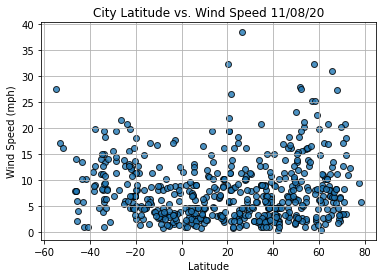

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()